In [1]:
import os
import urllib.request
from pandas import read_csv

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
import pandas as pd

import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
import numpy as np

/home/smithtape/anaconda3/envs/envtwo/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# URL of the dataset
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"

# Local path where the dataset will be saved
local_data_path = "housing.data"

# Check if file already exists, if not, download it
if not os.path.exists(local_data_path):
    urllib.request.urlretrieve(data_url, local_data_path)
    print("File downloaded and saved locally.")
else:
    print("File already exists.")

column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = read_csv(local_data_path, header=None, delimiter=r"\s+", names=column_names)
print(data.head(5))

File downloaded and saved locally.
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [3]:
# Print the first 5 rows of the dataframe
print(data.head(5))

# Check the shape of the dataframe
print("Shape of the DataFrame:", data.shape)

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  
Shape of the DataFrame: (506, 14)


In [4]:
# Check for NaN values in the DataFrame
if data.isnull().values.any():
    print("There are missing values in the DataFrame.")
else:
    print("There are no missing values in the DataFrame.")

# Get the count of NaN values in each column
print(data.isnull().sum())

There are no missing values in the DataFrame.
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


In [5]:
stats = data.describe()
print(stats)

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

/home/smithtape/anaconda3/envs/envtwo/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/smithtape/anaconda3/envs/envtwo/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/smithtape/anaconda3/envs/envtwo/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/smithtape/anaconda3/envs/envtwo/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed i

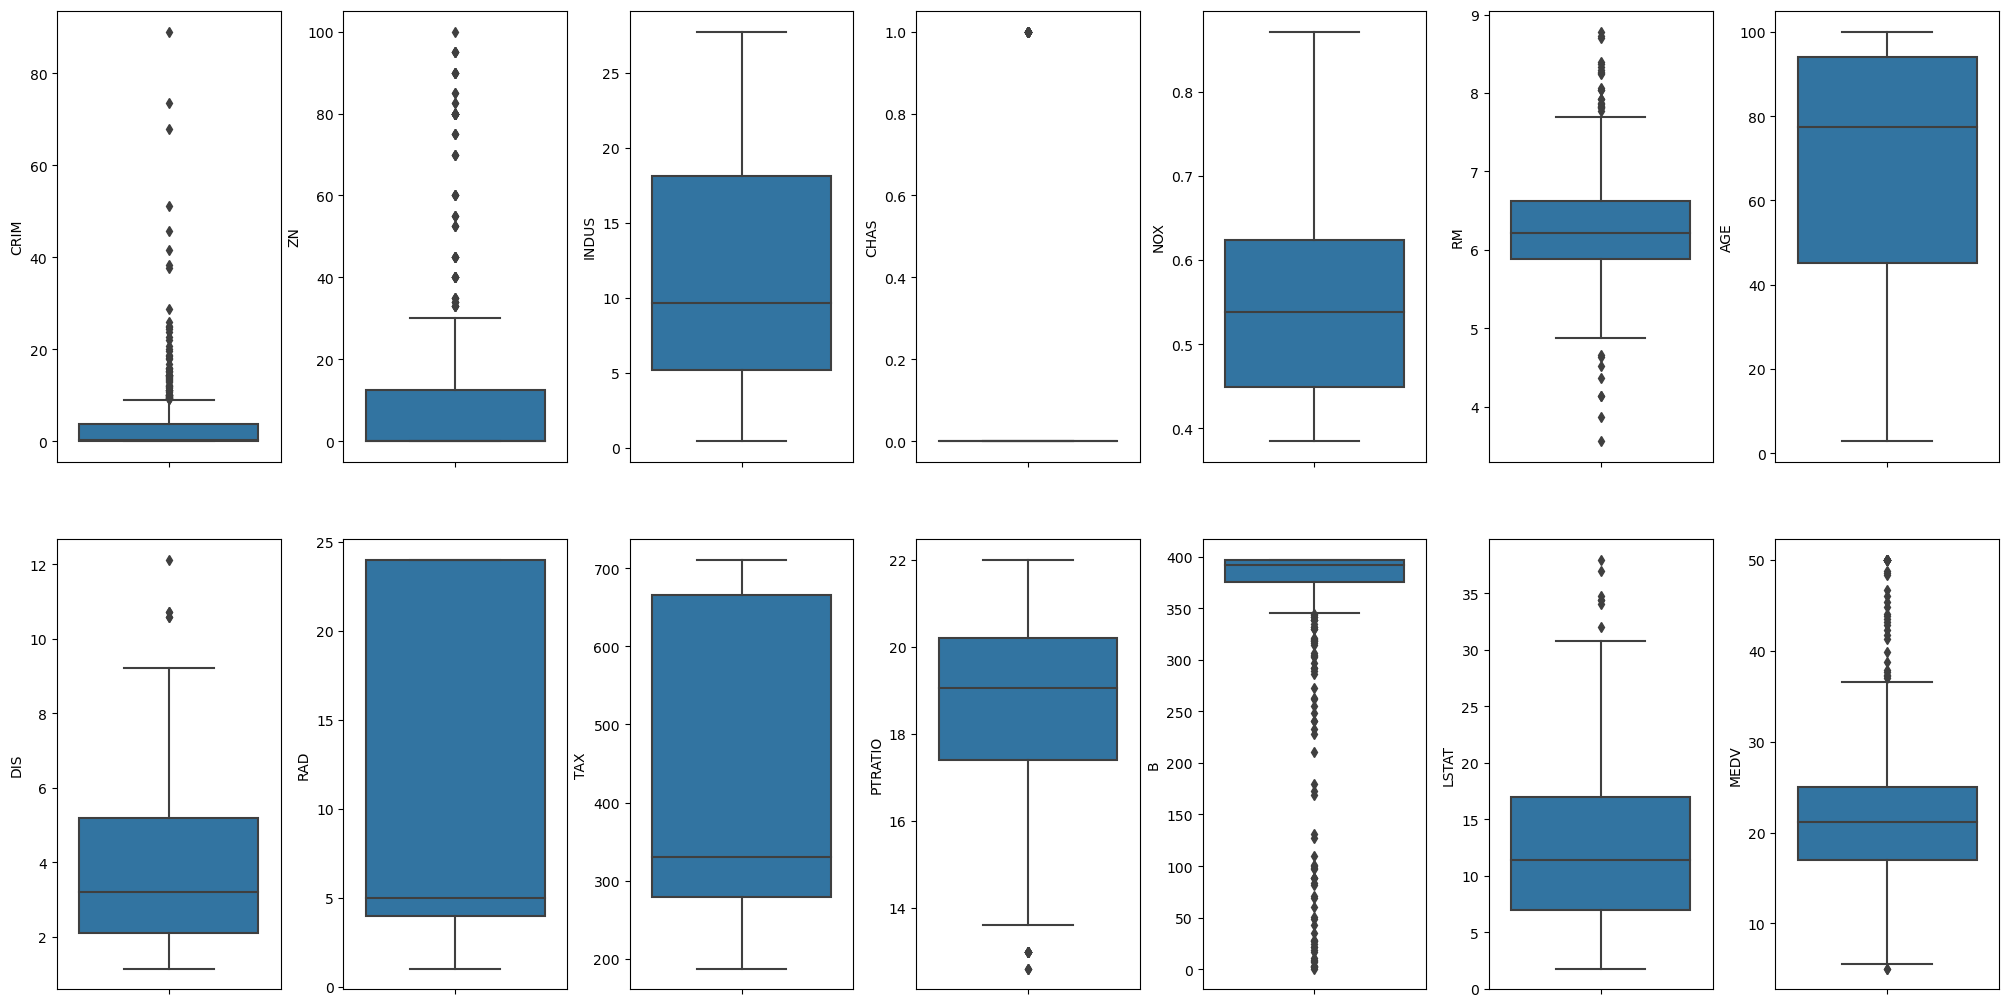

In [6]:
# Initialize variables for subplot grid
num_rows = 2
num_cols = 7
fig_size = (20, 10)

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=fig_size)

# Flatten axes for easy iteration
flat_axes = axes.ravel()

# Create boxplots for each column
for i, col in enumerate(data.columns):
    sns.boxplot(y=data[col], ax=flat_axes[i])

# Adjust layout to prevent overlap
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

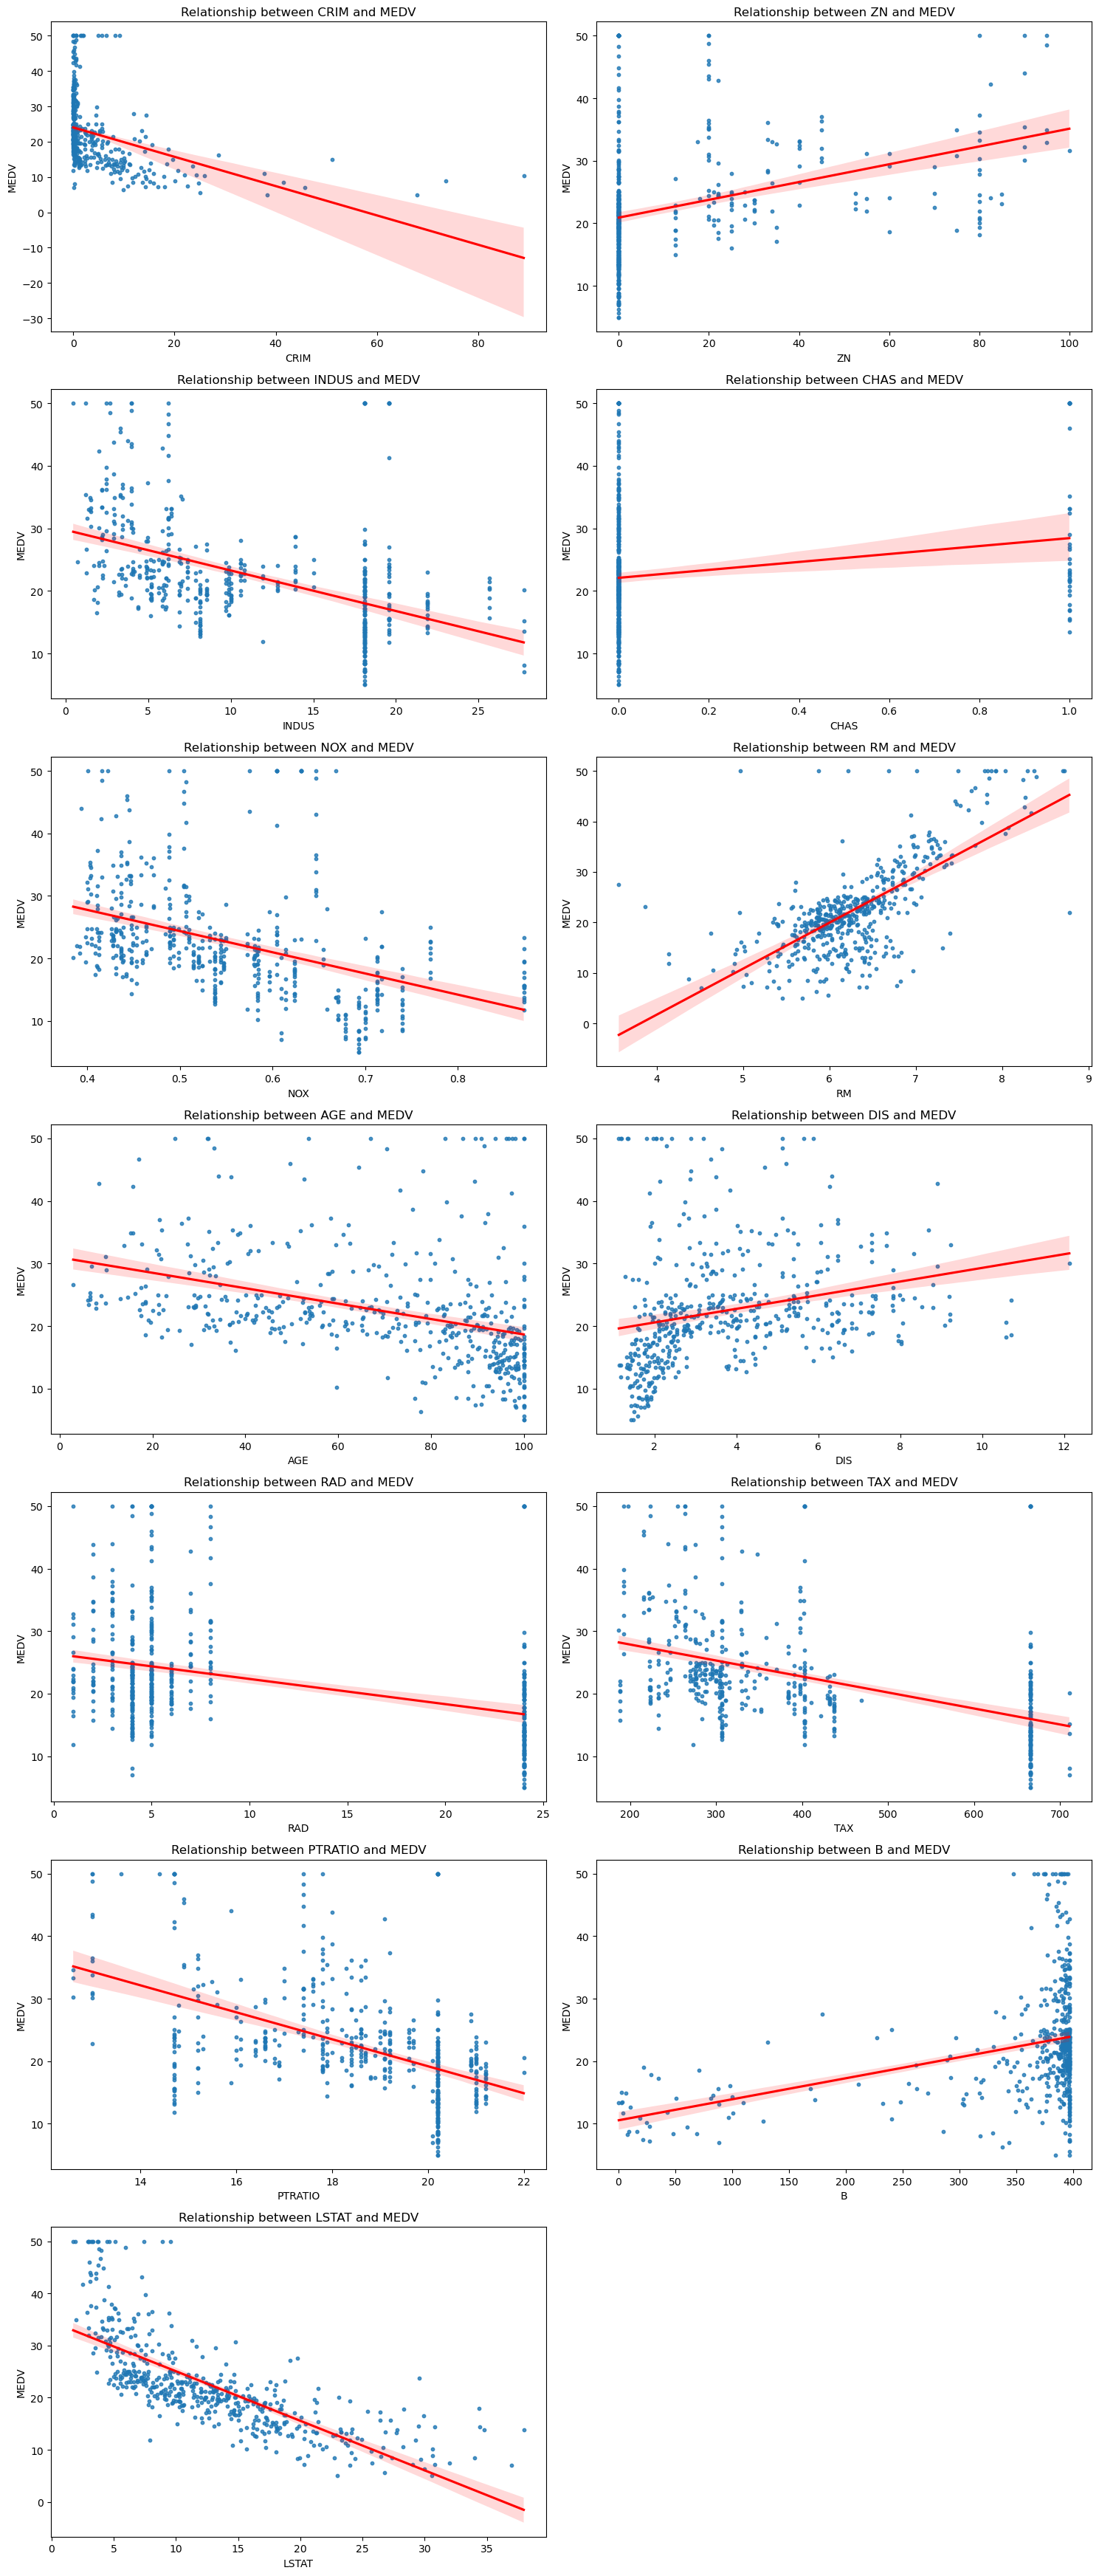

In [7]:
# Number of features
num_features = len(data.columns) - 1  # excluding target variable MEDV

# Determine the number of rows needed for subplots based on the number of features
num_rows = num_features // 2 if num_features % 2 == 0 else num_features // 2 + 1

# Create subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(15, num_rows * 5))
axes = axes.flatten()  # flatten axes to easily iterate

# Create a scatterplot with regression line for each feature against MEDV
for i, feature in enumerate(data.columns):
    if feature == 'MEDV':
        continue  # skip target variable MEDV
    sns.regplot(x=feature, y='MEDV', data=data, ax=axes[i], scatter_kws={'s': 10}, line_kws={'color': 'red'})
    axes[i].set_title(f'Relationship between {feature} and MEDV')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('MEDV')

# Remove any empty subplots
for i in range(num_features, len(axes)):
    fig.delaxes(axes[i])

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


In [8]:
# Assuming 'data' is your DataFrame
X = data.drop('MEDV', axis=1)  # features
y = data['MEDV']  # target variable

# Print the shapes of the new dataframes
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

# Print the first few rows to visually inspect both datasets
print("\nFirst few rows of X:")
print(X.head())

print("\nFirst few rows of y:")
print(y.head())


Shape of X: (506, 13)
Shape of y: (506,)

First few rows of X:
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  

First few rows of y:
0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64


In [9]:
# Assuming 'X' is your features DataFrame
scaler = MinMaxScaler()

# Compute minimum and maximum on the training data and scale it
X_normalized = scaler.fit_transform(X)

# Convert the normalized features array back to a DataFrame for ease of use
X_normalized = pd.DataFrame(X_normalized, columns=X.columns)

# Print the first few rows to visually inspect the normalized features
print("\nFirst few rows of the normalized features:")
print(X_normalized.head())



First few rows of the normalized features:
       CRIM    ZN     INDUS  CHAS       NOX        RM       AGE       DIS  \
0  0.000000  0.18  0.067815   0.0  0.314815  0.577505  0.641607  0.269203   
1  0.000236  0.00  0.242302   0.0  0.172840  0.547998  0.782698  0.348962   
2  0.000236  0.00  0.242302   0.0  0.172840  0.694386  0.599382  0.348962   
3  0.000293  0.00  0.063050   0.0  0.150206  0.658555  0.441813  0.448545   
4  0.000705  0.00  0.063050   0.0  0.150206  0.687105  0.528321  0.448545   

        RAD       TAX   PTRATIO         B     LSTAT  
0  0.000000  0.208015  0.287234  1.000000  0.089680  
1  0.043478  0.104962  0.553191  1.000000  0.204470  
2  0.043478  0.104962  0.553191  0.989737  0.063466  
3  0.086957  0.066794  0.648936  0.994276  0.033389  
4  0.086957  0.066794  0.648936  1.000000  0.099338  


Epoch 1, Train Loss: 608.7505493164062, Validation Loss: 575.6632690429688
Epoch 2, Train Loss: 586.320068359375, Validation Loss: 546.6475219726562
Epoch 3, Train Loss: 557.3822021484375, Validation Loss: 505.74871826171875
Epoch 4, Train Loss: 517.3635864257812, Validation Loss: 451.0887145996094
Epoch 5, Train Loss: 460.4692077636719, Validation Loss: 383.10589599609375
Epoch 6, Train Loss: 394.7044982910156, Validation Loss: 304.95458984375
Epoch 7, Train Loss: 317.1676940917969, Validation Loss: 225.14959716796875
Epoch 8, Train Loss: 242.9877471923828, Validation Loss: 160.11314392089844
Epoch 9, Train Loss: 167.74850463867188, Validation Loss: 135.33323669433594
Epoch 10, Train Loss: 147.4626007080078, Validation Loss: 163.4678955078125
Epoch 11, Train Loss: 171.2987823486328, Validation Loss: 201.44677734375
Epoch 12, Train Loss: 214.5843963623047, Validation Loss: 201.4431915283203
Epoch 13, Train Loss: 204.54196166992188, Validation Loss: 171.11460876464844
Epoch 14, Train Lo

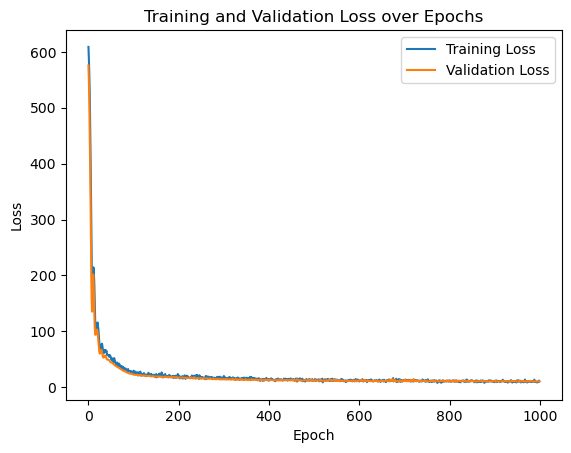

Evaluation metrics on Test data
Mean Absolute Error (MAE): 2.0933741560169294
Mean Squared Error (MSE): 9.949605599551136
Root Mean Squared Error (RMSE): 3.154299541824006
R-Squared (R2): 0.8643243922408964
Mean Absolute Percentage Error (MAPE): 10.736959651225686%


In [10]:
# 'data' is DataFrame and 'X_normalized' is features DataFrame after normalization
# Convert from Pandas dataframe to numpy arrays before converting to tensors
X_numpy = X_normalized.to_numpy()
y_numpy = y.to_numpy().reshape(-1, 1)  # reshaping target to make it two-dimensional array

# Split the dataset into training, validation, and test sets
X_temp, X_test, y_temp, y_test = train_test_split(X_numpy, y_numpy, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

# Convert numpy arrays to torch tensors
X_train_tensor = torch.from_numpy(X_train).float()
y_train_tensor = torch.from_numpy(y_train).float()

X_val_tensor = torch.from_numpy(X_val).float()
y_val_tensor = torch.from_numpy(y_val).float()

X_test_tensor = torch.from_numpy(X_test).float()
y_test_tensor = torch.from_numpy(y_test).float()

# Define a model
class Net(nn.Module):
    def __init__(self, num_features):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(num_features, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 1)
        self.dropout = nn.Dropout(0.2)
        self.act = nn.ReLU()

    def forward(self, x):
        x = self.act(self.fc1(x))
        x = self.dropout(x)
        x = self.act(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x

# Instantiate the network
num_features = X_train_tensor.shape[1]
net = Net(num_features)

# Define a loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=0.01)

# Train the network
epochs = 1000
train_losses, val_losses = [], []
for epoch in range(epochs):  # loop over the dataset multiple times
    net.train()
    optimizer.zero_grad()  # zero the parameter gradients
    output = net(X_train_tensor)  # forward pass
    loss = criterion(output, y_train_tensor)  # compute loss
    loss.backward()  # backward pass
    optimizer.step()  # optimize
    train_losses.append(loss.item())

    net.eval()
    with torch.no_grad():
        val_output = net(X_val_tensor)
        val_loss = criterion(val_output, y_val_tensor)
        val_losses.append(val_loss.item())

    print(f'Epoch {epoch+1}, Train Loss: {loss.item()}, Validation Loss: {val_loss.item()}')

print('Finished Training')

# Plotting training and validation loss
plt.figure()
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluation on test set
net.eval()
with torch.no_grad():
    predictions = net(X_test_tensor)
    predictions = predictions.numpy()

# Calculate the evaluation metrics
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)
mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100

print('Evaluation metrics on Test data')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-Squared (R2): {r2}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}%')


In [11]:
# Making predictions on test data
net.eval()  # Ensure the network is in evaluation mode
with torch.no_grad():  # No need to track the gradients when making predictions
    test_predictions = net(X_test_tensor)

# Converting predictions to a numpy array (if you want to work with them further)
predicted_prices = test_predictions.numpy()

# If you want to put these predictions alongside actual prices into a DataFrame, you can do this:
test_results_df = pd.DataFrame(data={
    'Actual Prices': y_test.flatten(),  # Flatten to make it a 1D array
    'Predicted Prices': predicted_prices.flatten()  # Flatten to make it a 1D array
})

print(test_results_df)


     Actual Prices  Predicted Prices
0             23.6         25.658819
1             32.4         35.185051
2             13.6         16.161257
3             22.8         24.732307
4             16.1         16.027134
..             ...               ...
97            17.9         10.246089
98             9.6         11.251617
99            17.2         11.586448
100           22.5         23.002480
101           21.4         22.287685

[102 rows x 2 columns]


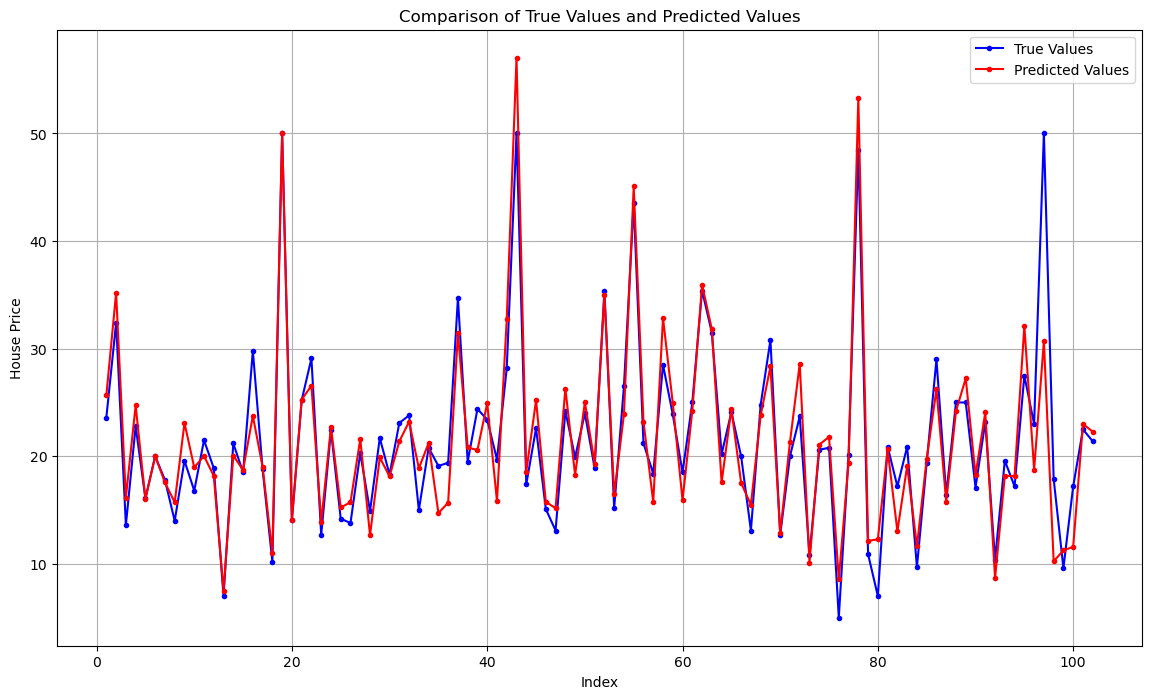

In [12]:
# 'predicted_prices' and 'y_test' are numpy arrays containing data
true_values = y_test.flatten()
predicted_values = predicted_prices.flatten()

# Creating the index for the x-axis
index = range(1, len(true_values) + 1)  # e.g., 1, 2, 3, ..., number of test samples

plt.figure(figsize=(14, 8))

# Plotting true values
plt.plot(index, true_values, color='blue', label='True Values', marker='.')

# Plotting predicted values
plt.plot(index, predicted_values, color='red', label='Predicted Values', marker='.')

plt.title('Comparison of True Values and Predicted Values')
plt.xlabel('Index')
plt.ylabel('House Price')
plt.legend()
plt.grid(True)
plt.show()


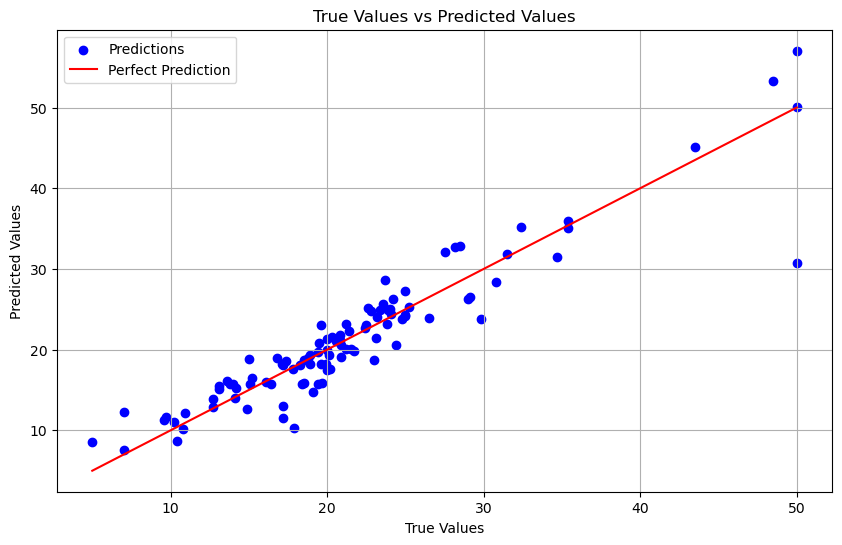

In [13]:
# Assuming 'predicted_prices' and 'y_test' are numpy arrays containing your data
true_values = y_test.flatten()
predicted_values = predicted_prices.flatten()

# Creating a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(true_values, predicted_values, color='blue', label='Predictions')
plt.plot([min(true_values), max(true_values)], [min(true_values), max(true_values)], color='red', label='Perfect Prediction') # Line of perfect prediction
plt.title('True Values vs Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()
